## Importing the dataset from Kaggle

In [ ]:
# Installing the Kaggle library
!pip install kaggle

In [ ]:
# Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 804M/812M [00:09<00:00, 46.2MB/s]
100% 812M/812M [00:09<00:00, 93.2MB/s]


In [ ]:
# Extracting the dataset from the dogs-vs-cats.zip file
from zipfile import ZipFile

with ZipFile("/content/dogs-vs-cats.zip", "r") as zip:
  zip.extractall()
  print("The dataset has been extracted from the dogs-vs-cats.zip file!")

The dataset has been extracted from the dogs-vs-cats.zip file!


In [ ]:
# Extracting the dataset from the train.zip file
with ZipFile("/content/train.zip", "r") as zip:
  zip.extractall()
  print("The dataset has been extracted from the train.zip file!")

The dataset has been extracted from the train.zip file!


## Importing some required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Doing some data analysis

### The number of images in the train folder

In [ ]:
import os
images = os.listdir("/content/train")
print("The number of images in the train folder is: ", len(images))

The number of images in the train folder is:  25000


### The number of cat and dog images in the train folder

In [ ]:
cats = 0
dogs = 0
for image in images:
  if image[:3] == 'cat':
    cats += 1
  else:
    dogs += 1
print("The number of cat images in the train folder is: ", cats)
print("The number of dog images in the train folder is: ", dogs)

The number of cat images in the train folder is:  12500
The number of dog images in the train folder is:  12500


### Displaying the first image of dog and cat in the train folder

In [ ]:
print(images[:5])

['cat.7437.jpg', 'dog.8653.jpg', 'cat.5799.jpg', 'dog.2425.jpg', 'cat.10934.jpg']


The image size:  (500, 459)
The cat image:


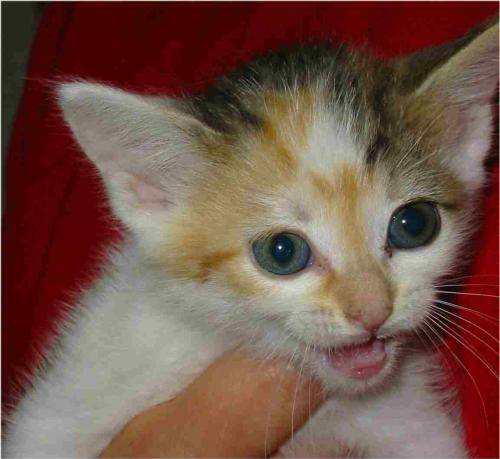


The image size:  (319, 305)
The dog image:


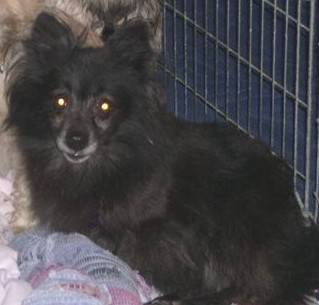

In [ ]:
from PIL import Image

for image in images[:2]:
  img = Image.open("train/" + image)
  print(f"The image size: ", img.size)
  print(f"The {image[:3]} image:")
  display(img)
  print()

### The size of the fist 5 images in the train folder

In [ ]:
for i, image in enumerate(images[:5]):
  img = Image.open("train/" + image)
  print(f"Image {i+1}: {img.size}")

Image 1: (500, 459)
Image 2: (319, 305)
Image 3: (440, 500)
Image 4: (249, 215)
Image 5: (432, 323)


## Resizing all the images in the train folder and saving them in the train1 folder

In [ ]:
# Resizing all the images in the train folder and saving them in the train1 folder
for image in images:
  img = Image.open("train/"+image)
  img = img.resize((224,224))
  img.save("train1/"+image)
  img.close()

The image size:  (224, 224)
The cat image:


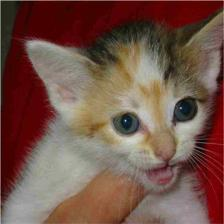


The image size:  (224, 224)
The dog image:


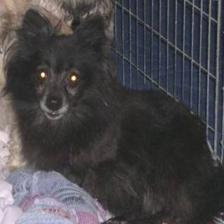

In [ ]:
# Displaying the first two images in the train1 folder with their size
for image in images[:2]:
  img = Image.open("train1/" + image)
  print(f"The image size: ", img.size)
  print(f"The {image[:3]} image:")
  display(img)
  print()

## Converting the images to a numpy array / Getting the independent variables from the first 2000 images in the train1 folder

In [ ]:
# Getting the independent variables
images_array = []
for image in images[:2000]:
  img = Image.open("train1/"+image)
  img_array = np.array(img)
  images_array.append(img_array)
X = np.array(images_array)

In [ ]:
print(X.shape)

(2000, 224, 224, 3)


## Getting the dependent variable from the first 2000 images
* Cat ---> 0
* Dog ---> 1

In [ ]:
y = []
for image in images[:2000]:
  if image[:3] == 'cat':
    y.append(0)
  else:
    y.append(1)
y = np.array(y)

In [ ]:
print(y.shape)

(2000,)


## Counting the number of dogs and cats chosen from the first 2000 images

In [ ]:
print("The number of cats is: ", np.count_nonzero(y == 0))
print("The number of dogs is: ", np.count_nonzero(y == 1))

The number of cats is:  975
The number of dogs is:  1025


## Splitting the dataset into the training set and the test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 224, 224, 3)
(400, 224, 224, 3)
(1600,)
(400,)


## Normalizing the independent variables

In [ ]:
# scaling the data
X_train = X_train/255
X_test = X_test/255

## Building the neural network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(units=2)
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer= "adam",
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 65s 1s/step - loss: 0.5552 - accuracy: 0.8344
Epoch 2/5
50/50 [==============================] - 62s 1s/step - loss: 0.6628 - accuracy: 0.9600
Epoch 3/5
50/50 [==============================] - 68s 1s/step - loss: 0.6650 - accuracy: 0.9594
Epoch 4/5
50/50 [==============================] - 58s 1s/step - loss: 0.6650 - accuracy: 0.9594
Epoch 5/5
50/50 [==============================] - 55s 1s/step - loss: 0.6650 - accuracy: 0.9594


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss: ", loss)
print("Test accuracy: ", accuracy)

13/13 [==============================] - 17s 1s/step - loss: 0.6654 - accuracy: 0.9575
Test loss:  0.6654213666915894
Test accuracy:  0.9574999809265137


## Building a predictive system

Enter the path of the image: /content/360_F_266724172_Iy8gdKgMa7XmrhYYxLCxyhx6J7070Pr8.jpg
1/1 [==============================] - 0s 73ms/step


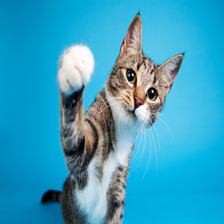

This image represents a cat!


In [ ]:
path = input("Enter the path of the image: ")
img = Image.open(path)
img = img.resize((224,224))
img_array = np.array(img).reshape(1,224,224,3)
img_array = img_array/255
y_pred = model.predict(img_array)
label = np.argmax(y_pred)

display(img)
if label == 0:
  print("This image represents a cat!")
else:
  print("This image respresents a dog!")

## Saving the trained model and building a predictive system using the saved model

In [ ]:
import pickle

# Saving the trained model
filename = "trained_model.sav"
pickle.dump(model, open(filename, "wb"))

In [ ]:
# Loading the trained model
custom_objects = {
    'KerasLayer': hub.KerasLayer
}

with tf.keras.utils.custom_object_scope(custom_objects):
  trained_model = pickle.load(open("trained_model.sav", 'rb'))

Enter the path of the image: /content/istockphoto-509052128-612x612.jpg
1/1 [==============================] - 0s 62ms/step


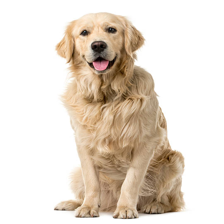

This image respresents a dog!


In [ ]:
path = input("Enter the path of the image: ")
img = Image.open(path)
img = img.resize((224,224))
img_array = np.array(img).reshape(1,224,224,3)
img_array = img_array/255
y_pred = trained_model.predict(img_array)
label = np.argmax(y_pred)

display(img)
if label == 0:
  print("This image represents a cat!")
else:
  print("This image respresents a dog!")